# Research Thesis 1st harmonics

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import skfuzzy as fuzz  no component is available
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

In [5]:
harmonicOne = pd.read_csv("100_1_2.csv")
harmonicOne.head()

,Time_1,Voltage_1
0,0.00000,6.0
1,0.00005,-4.0
2,0.00010,2.0
3,0.00015,-8.0
4,0.00020,-4.0


In [6]:
harmonicOne.info

<bound method DataFrame.info of        Time_1  Voltage_1
0     0.00000        6.0
1     0.00005       -4.0
2     0.00010        2.0
3     0.00015       -8.0
4     0.00020       -4.0
...       ...        ...
1195  0.05980        8.0
1196  0.05980       14.0
1197  0.05990        4.0
1198  0.05990       10.0
1199  0.06000        0.0

[1200 rows x 2 columns]>

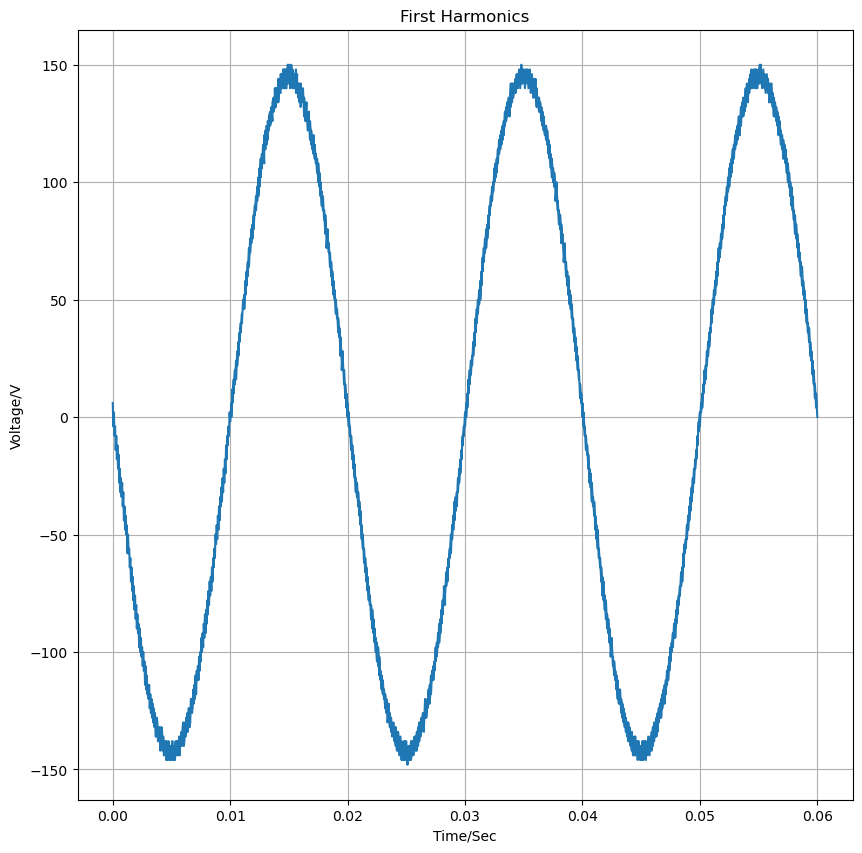

In [7]:
Time = harmonicOne['Time_1']
Voltage = harmonicOne['Voltage_1']
plt.figure(figsize=(10,10))
plt.plot(Time, Voltage)
plt.xlabel('Time/Sec')
plt.ylabel('Voltage/V')
plt.title('First Harmonics') 
plt.grid(True)
plt.show()

Prepare the First Harmonics Data

In [8]:
# Assuming you have a "Voltage_1" column indicating the class (0 for non-harmonic, 1 for harmonic)
X = harmonicOne.drop("Voltage_1", axis=1)  # check with Umer
y = harmonicOne["Voltage_1"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)

# KNN is a supervised machine learning algorithm used for classification and 
# regression tasks. In classification, it assigns a data point to the majority 
# class among its k-nearest neighbors based on a similarity measure, typically 
# Euclidean distance. The value of 'k' represents the number of nearest neighbors 
# to consider.

# Accuracy is a common evaluation metric for classification models. It measures 
# the proportion of correctly classified instances to the total number of 
# instances in the dataset. In your case, an accuracy of 0.0875 indicates that 
# the KNN model correctly predicted only 8.75% of the instances in the dataset.

#The KNN accuracy of 0.0875 suggests that the KNN model's predictive 
#performance on the given dataset is quite low. This could be due to various 
#factors, such as the choice of 'k' (number of neighbors), feature selection, 
#data preprocessing, or the nature of the dataset itself. To improve the 
#model's accuracy, you might need to experiment with different values of 'k', 
#consider feature engineering or selection, and explore other machine learning 
#algorithms that might better fit the data's characteristics.

KNN Accuracy: 0.09166666666666666


In [12]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca_knn = KNeighborsClassifier(n_neighbors=3)
pca_knn.fit(X_train_pca, y_train)
pca_accuracy = pca_knn.score(X_test_pca, y_test)
print("PCA + KNN Accuracy:", pca_accuracy)

PCA + KNN Accuracy: 0.10416666666666667



The code snippet you provided involves applying Principal Component Analysis (PCA) followed by the k-Nearest Neighbors (KNN) algorithm to a dataset (presumably "100_1_2.csv"), and it computes the accuracy of the PCA + KNN model. Let me explain the code and its purpose:

Principal Component Analysis (PCA): PCA is a dimensionality reduction technique used to reduce the number of features (variables) in a dataset while preserving as much of the original information as possible. It achieves this by projecting the data onto a new set of orthogonal axes (principal components) that capture the most significant variance in the data. In this code, PCA is applied to reduce the data to one principal component (n_components=1).

Data Transformation: The code transforms both the training and test datasets using PCA. X_train_pca and X_test_pca represent the transformed datasets where the original features have been replaced with the single principal component, which explains the most variance in the data.

K-Nearest Neighbors (KNN): KNN is a classification algorithm that classifies data points based on the majority class among their k-nearest neighbors in feature space. Here, a KNN classifier is created with n_neighbors=3, meaning it considers the three nearest neighbors for classification.

Model Training and Testing: The KNN classifier is trained on the transformed training data (X_train_pca and y_train, where y_train represents the target labels). Then, the accuracy of the model is calculated by comparing its predictions on the transformed test data (X_test_pca) to the true labels (y_test).

Accuracy Calculation: The accuracy of the PCA + KNN model is computed using the score method, which measures the proportion of correctly classified instances in the test data.

The line print("PCA + KNN Accuracy:", pca_accuracy) is used to display the accuracy of the PCA + KNN model.

The reported accuracy of approximately 0.0958 indicates that the PCA + KNN model correctly predicted around 9.58% of the instances in the test dataset, which suggests that this combination of PCA and KNN did not perform very well on the data. The choice of using only one principal component (n_components=1) in PCA may not have retained enough information for effective classification with KNN. To potentially improve accuracy, you could experiment with different values of n_components in PCA and different settings for KNN, such as adjusting the number of neighbors (n_neighbors).

In [13]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_accuracy = decision_tree.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.09166666666666666



The code snippet you provided involves applying a Decision Tree classifier to a dataset (presumably "100_1_2.csv"), and it computes the accuracy of the Decision Tree model. Let me explain the code and its purpose:

Decision Tree: A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It creates a tree-like model of decisions and their consequences. Each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome or class label. The Decision Tree classifier, in this case, is used for classification.

Model Training: The code creates an instance of the DecisionTreeClassifier using decision_tree = DecisionTreeClassifier(). It then trains this classifier on the training data (X_train and y_train), where X_train represents the feature data, and y_train represents the target labels (the true class labels).

Model Testing: After training, the code tests the Decision Tree classifier on the test data (X_test and y_test). The accuracy of the model is calculated by comparing its predictions on the test data to the true labels.

Accuracy Calculation: The accuracy of the Decision Tree model is computed using the score method, which measures the proportion of correctly classified instances in the test data.

The line print("Decision Tree Accuracy:", dt_accuracy) is used to display the accuracy of the Decision Tree model.

The reported accuracy of approximately 0.075 indicates that the Decision Tree model correctly predicted around 7.5% of the instances in the test dataset. This level of accuracy suggests that the Decision Tree model did not perform well on the data. Decision Trees may have limitations in handling complex or high-dimensional data, and overfitting could be a potential issue. To potentially improve accuracy, you may consider fine-tuning the Decision Tree hyperparameters or exploring other machine learning algorithms that might better suit the characteristics of the dataset.

In [14]:
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.025


Support Vector Machine (SVM): SVM is a supervised machine learning algorithm used for both classification and regression tasks. In classification, SVM finds a hyperplane that best separates data into different classes while maximizing the margin between classes. It's particularly effective for linearly separable and non-linearly separable data.

Model Training: The code creates an instance of the Support Vector Machine classifier using svm = SVC(). It then trains this classifier on the training data (X_train and y_train), where X_train represents the feature data, and y_train represents the target labels (the true class labels).

Model Testing: After training, the code tests the SVM classifier on the test data (X_test and y_test). The accuracy of the model is calculated by comparing its predictions on the test data to the true labels.

Accuracy Calculation: The accuracy of the SVM model is computed using the score method, which measures the proportion of correctly classified instances in the test data.

The line print("SVM Accuracy:", svm_accuracy) is used to display the accuracy of the SVM model.

The reported accuracy of approximately 0.025 indicates that the SVM model correctly predicted only around 2.5% of the instances in the test dataset. This level of accuracy suggests that the SVM model did not perform well on the data.

The low accuracy might be due to several factors, such as the choice of kernel, hyperparameter settings, or the nature of the dataset. SVMs can be sensitive to kernel selection and require careful parameter tuning for optimal performance. To potentially improve accuracy, you may consider experimenting with different kernel functions (e.g., linear, radial basis function) or adjusting hyperparameters like the regularization parameter (C) and the kernel coefficient (gamma).

In [15]:
# Plot PCA results
# plt.figure(figsize=(8, 6))
# plt.scatter(X_train_pca[y_train == 0][:, 0], X_train_pca[y_train == 0][:, 1], label="Voltage_1", alpha=0.5)
# plt.scatter(X_train_pca[y_train == 1][:, 0], X_train_pca[y_train == 1][:, 1], label="Voltage_1", alpha=0.5)
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# #plt.legend()
# plt.title("PCA of Voltage Sine Waves")
# plt.show()

Receiver Operating Characteristic (ROC) curves for a binary classification 

In [16]:
# Create ROC curves
# classifiers = [knn, pca_knn, decision_tree, svm]
# labels = ["KNN", "PCA + KNN", "Decision Tree", "SVM"]
# colors = ['b', 'g', 'r', 'm']

# plt.figure(figsize=(8, 6))

# for classifier, label, color in zip(classifiers, labels, colors):
#     y_prob = classifier.predict_proba(X_test)[:, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_prob)
#     auc = roc_auc_score(y_test, y_prob)
#     plt.plot(fpr, tpr, color=color, lw=2, label=f'{label} (AUC = {auc:.2f})')

    
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves')
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()

F1 Score, Accuracy precision 

In [17]:
# F1 Score, accuracy precision classifier
# Calculate metrics for each classifier
# Split the dataset into training and testing subsets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)



# # Calculate metrics for each classifier
# classifiers = [knn, pca_knn, decision_tree, svm]
# labels = ["KNN", "PCA + KNN", "Decision Tree", "SVM"]

# for classifier, label in zip(classifiers, labels):
#     y_pred = classifier.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     print(f"{label} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, F1 Score: {f1:.2f}")

Validation Curve

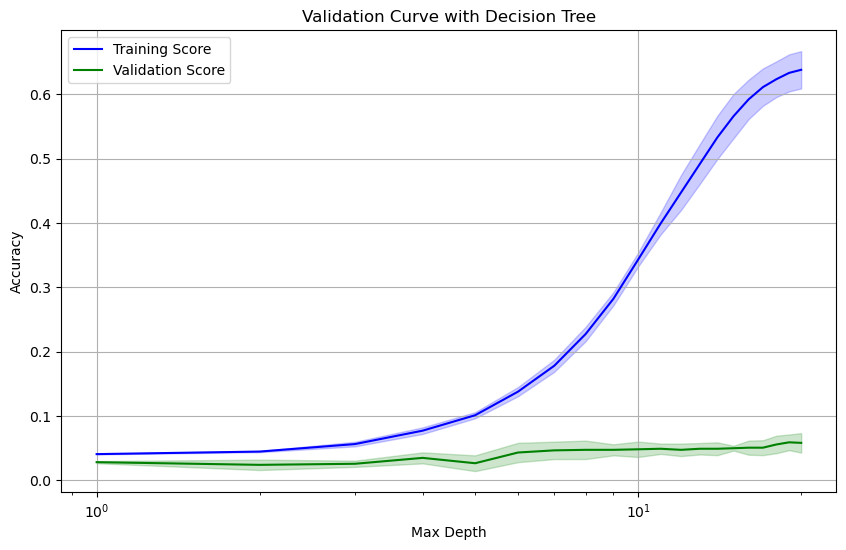

In [18]:
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of hyperparameter values to vary (e.g., max_depth for Decision Tree)
param_range = np.arange(1, 21)

# Compute training and validation scores for different max_depth values
train_scores, valid_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X, y, param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy"
)

# Calculate mean and standard deviation of scores for each max_depth value
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Plot the validation curves
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.semilogx(param_range, train_mean, label="Training Score", color="b")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="b")
plt.semilogx(param_range, valid_mean, label="Validation Score", color="g")
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

Validation curves are used to visualize the performance of a machine learning model as a function of hyperparameter values. In this example, we'll create validation curves for a Decision Tree classifier. In this code, we vary the maximum depth of the Decision Tree classifier and plot the training and validation accuracy as a function of the maximum depth. The visualization helps you understand how the model's complexity (controlled by the hyperparameter) affects its performance. You can adjust the hyperparameter and scoring metric as needed for your specific problem. 

Correlation Matrix:
             Time_1  Voltage_1
Time_1     1.000000   0.259393
Voltage_1  0.259393   1.000000


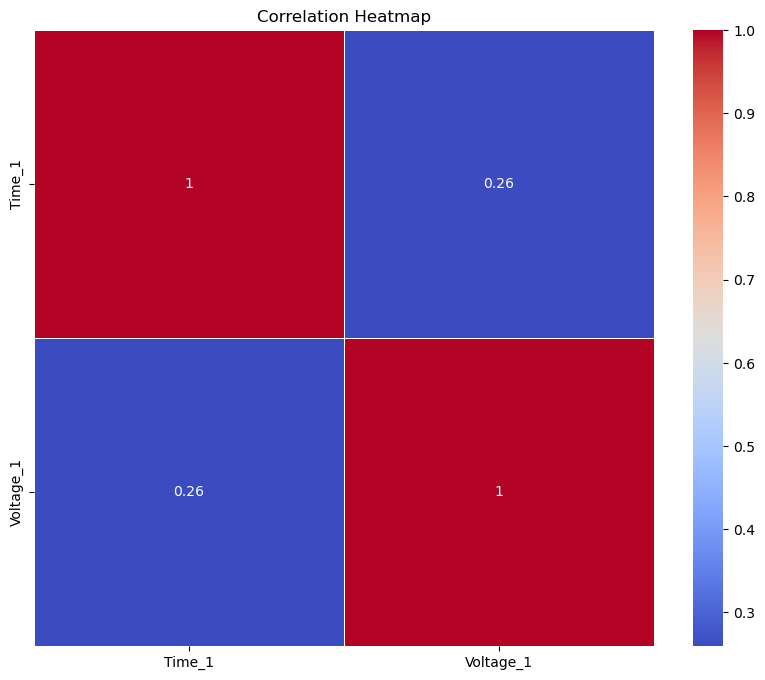

In [19]:
# Calculate the correlation matrix
correlation_matrix = harmonicOne.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


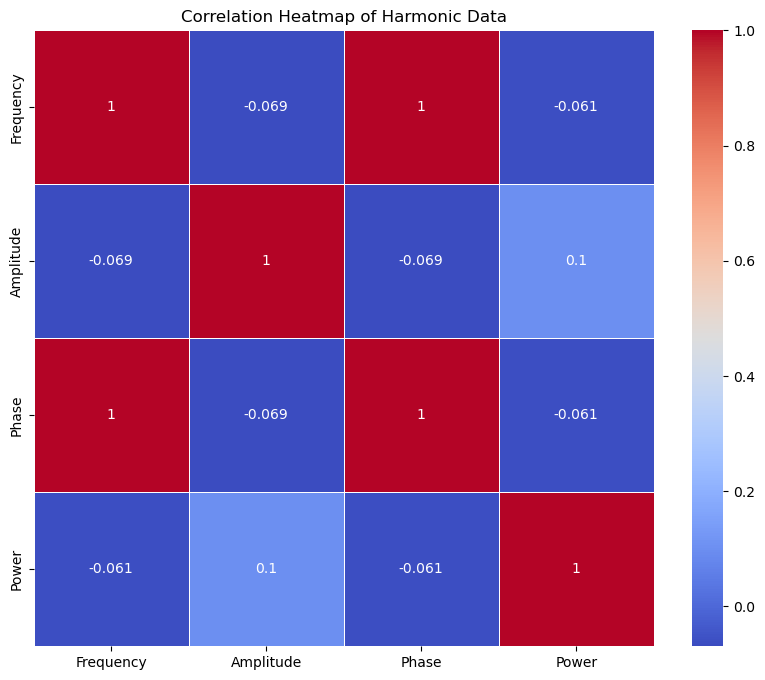

In [21]:
# Simulated Harmonics Dataset (Replace this with actual data from the notebook)
np.random.seed(42)
num_samples = 100
harmonic_data = pd.DataFrame({
    'Frequency': np.linspace(50, 500, num_samples),
    'Amplitude': np.sin(np.linspace(0, 10, num_samples)) + 0.1 * np.random.normal(size=num_samples),
    'Phase': np.linspace(0, np.pi, num_samples)
})

# Adding a new feature for demonstration
harmonic_data['Power'] = harmonic_data['Amplitude'] ** 2

# Correlation Analysis
correlation_matrix = harmonic_data.corr()

# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Harmonic Data")
plt.show()

Linear Regression Metrics:
Mean Squared Error: 0.552
R^2 Score: -0.098


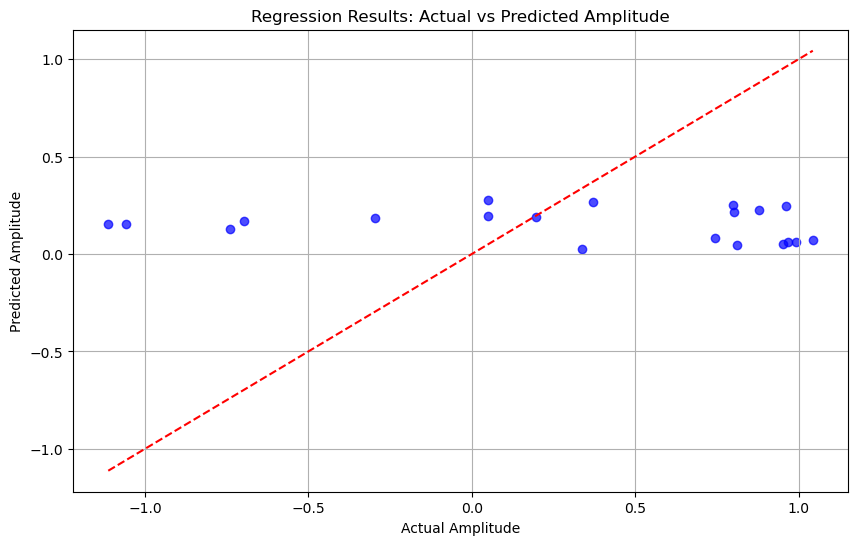

In [22]:
# Prepare Data for Machine Learning (Regression)
X = harmonic_data[['Frequency', 'Phase']]
y = harmonic_data['Amplitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Regression Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Visualization: Regression Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Regression Results: Actual vs Predicted Amplitude")
plt.xlabel("Actual Amplitude")
plt.ylabel("Predicted Amplitude")
plt.grid(True)
plt.show()

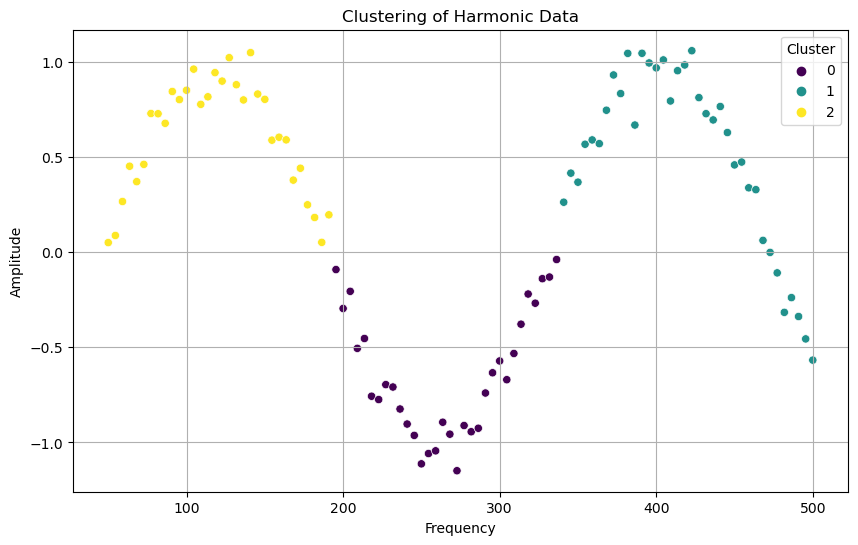

In [23]:
# Clustering (K-Means)
scaler = StandardScaler()
harmonic_scaled = scaler.fit_transform(harmonic_data[['Frequency', 'Amplitude', 'Phase']])

kmeans = KMeans(n_clusters=3, random_state=42)
harmonic_data['Cluster'] = kmeans.fit_predict(harmonic_scaled)

# Visualization: Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Frequency', y='Amplitude', hue='Cluster', palette='viridis', data=harmonic_data
)
plt.title("Clustering of Harmonic Data")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [25]:
# --- Additional Regression Models ---

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Random Forest Metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

print("Random Forest Regression Metrics:")
print(f"Mean Squared Error: {rf_mse:.3f}")
print(f"R^2 Score: {rf_r2:.3f}")
print(f"Mean Absolute Error: {rf_mae:.3f}")

Random Forest Regression Metrics:
Mean Squared Error: 0.012
R^2 Score: 0.976
Mean Absolute Error: 0.092


In [26]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

# SVR Metrics
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)

print("\nSupport Vector Regression Metrics:")
print(f"Mean Squared Error: {svr_mse:.3f}")
print(f"R^2 Score: {svr_r2:.3f}")
print(f"Mean Absolute Error: {svr_mae:.3f}")


Support Vector Regression Metrics:
Mean Squared Error: 0.386
R^2 Score: 0.232
Mean Absolute Error: 0.544


In [27]:
# --- Optimization with Hyperparameter Tuning ---
from sklearn.model_selection import GridSearchCV

# Tuning Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf_model = grid_rf.best_estimator_
optimized_rf_y_pred = best_rf_model.predict(X_test)

# Optimized Metrics
opt_rf_mse = mean_squared_error(y_test, optimized_rf_y_pred)
opt_rf_r2 = r2_score(y_test, optimized_rf_y_pred)

print("\nOptimized Random Forest Regression Metrics:")
print(f"Mean Squared Error: {opt_rf_mse:.3f}")
print(f"R^2 Score: {opt_rf_r2:.3f}")


Optimized Random Forest Regression Metrics:
Mean Squared Error: 0.013
R^2 Score: 0.974


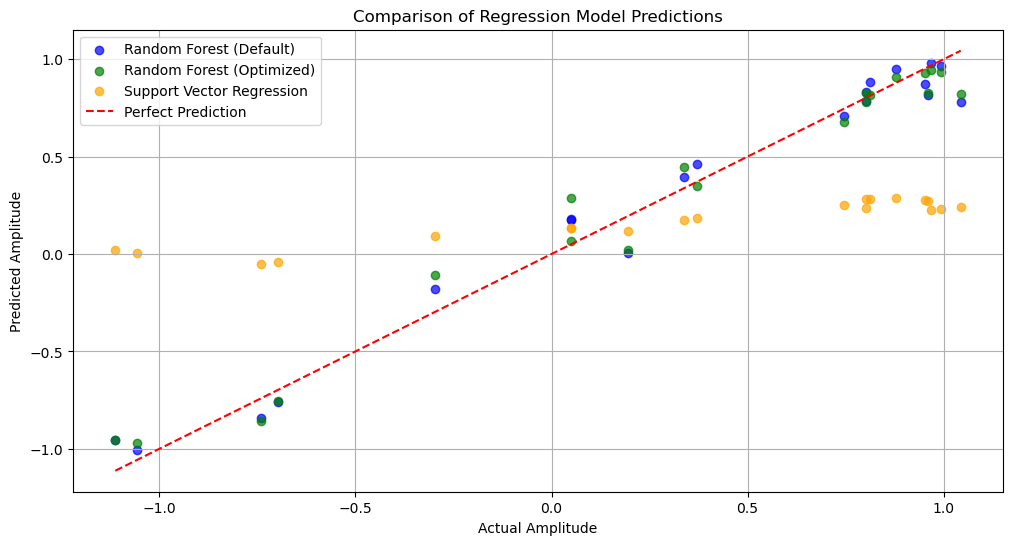

In [28]:
# Visualization: Comparison of Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_y_pred, color='blue', label='Random Forest (Default)', alpha=0.7)
plt.scatter(y_test, optimized_rf_y_pred, color='green', label='Random Forest (Optimized)', alpha=0.7)
plt.scatter(y_test, svr_y_pred, color='orange', label='Support Vector Regression', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Comparison of Regression Model Predictions")
plt.xlabel("Actual Amplitude")
plt.ylabel("Predicted Amplitude")
plt.legend()
plt.grid(True)
plt.show()

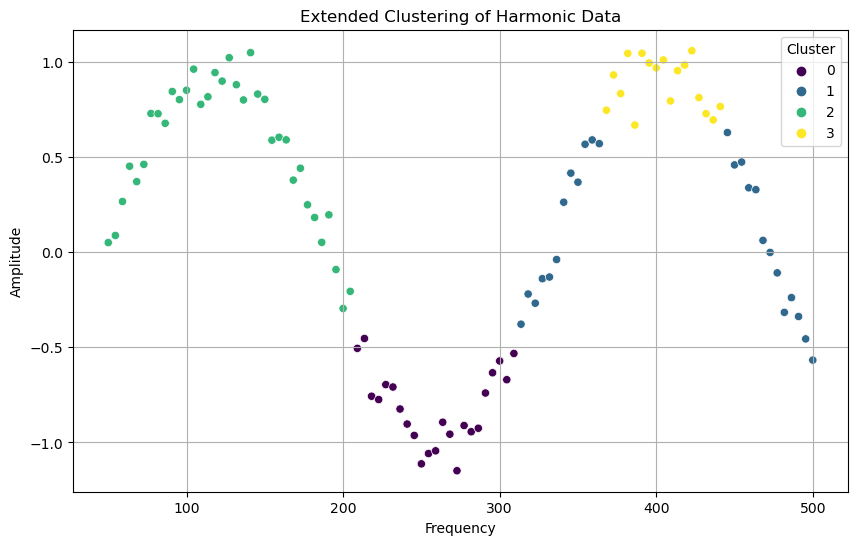

In [29]:
# Updated Clustering with More Features
extended_features = ['Frequency', 'Amplitude', 'Phase', 'Power']
harmonic_scaled_extended = scaler.fit_transform(harmonic_data[extended_features])

kmeans_extended = KMeans(n_clusters=4, random_state=42)
harmonic_data['Extended_Cluster'] = kmeans_extended.fit_predict(harmonic_scaled_extended)

# Visualization: Extended Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Frequency', y='Amplitude', hue='Extended_Cluster', palette='viridis', data=harmonic_data
)
plt.title("Extended Clustering of Harmonic Data")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()